<a href="https://colab.research.google.com/github/tejas-p-ramesh09/BDA/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=54ae3df2c109b7fb83d962d44942672d608a438ede3e27f987c8f109c0fb4fb8
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


## 1. Reading and Cleaning Stock Price Data

In [6]:
import pyspark
from pyspark.sql import SparkSession

In [7]:
spark = SparkSession.builder.appName("Stock Price Analysis").getOrCreate()

In [8]:
## Reading CSV data => Stocks
stocks = spark.read.csv("/tmp/StockData", header=True)

In [9]:
## Seeing Data => Dataframe
stocks.show(5)

+------+----------+----------+-------+--------+--------+--------+
|Ticker|      Date|Close/Last| Volume|    Open|    High|     Low|
+------+----------+----------+-------+--------+--------+--------+
| BRK-B|05/31/2023|  $321.08 |6175417|$321.12 |$322.41 |$319.39 |
| BRK-B|05/30/2023|  $322.19 |3232461|$321.86 |$322.47 |$319.00 |
| BRK-B|05/26/2023|  $320.60 |3229873|$320.44 |$322.63 |$319.67 |
| BRK-B|05/25/2023|  $319.02 |4251935|$320.56 |$320.56 |$317.71 |
| BRK-B|05/24/2023|  $320.20 |3075393|$322.71 |$323.00 |$319.56 |
+------+----------+----------+-------+--------+--------+--------+
only showing top 5 rows



In [10]:
## Seeing Schema of the Data => Data Types in Dataframe
stocks.printSchema()

root
 |-- Ticker: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Close/Last: string (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)



In [11]:
## Basic select operation => Select Ticker, Date and Close price

In [12]:
stocks.select("Ticker").show(3)

+------+
|Ticker|
+------+
| BRK-B|
| BRK-B|
| BRK-B|
+------+
only showing top 3 rows



In [13]:
stocks.select(["Ticker", "Date", "Open"]).show(5)

+------+----------+--------+
|Ticker|      Date|    Open|
+------+----------+--------+
| BRK-B|05/31/2023|$321.12 |
| BRK-B|05/30/2023|$321.86 |
| BRK-B|05/26/2023|$320.44 |
| BRK-B|05/25/2023|$320.56 |
| BRK-B|05/24/2023|$322.71 |
+------+----------+--------+
only showing top 5 rows



In [14]:
## Filtering Data => Select rows containing Microsoft Stock in last one month
stocks.filter(stocks.Ticker == "MSFT").show(10)

+------+----------+----------+--------+--------+--------+--------+
|Ticker|      Date|Close/Last|  Volume|    Open|    High|     Low|
+------+----------+----------+--------+--------+--------+--------+
|  MSFT|05/31/2023|  $328.39 |45950550|$332.29 |$335.94 |$327.33 |
|  MSFT|05/30/2023|  $331.21 |29503070|$335.23 |$335.74 |$330.52 |
|  MSFT|05/26/2023|  $332.89 |36630630|$324.02 |$333.40 |$323.88 |
|  MSFT|05/25/2023|  $325.92 |43301740|$323.24 |$326.90 |$320.00 |
|  MSFT|05/24/2023|  $313.85 |23384890|$314.73 |$316.50 |$312.61 |
|  MSFT|05/23/2023|  $315.26 |30797170|$320.03 |$322.72 |$315.25 |
|  MSFT|05/22/2023|  $321.18 |24115660|$318.60 |$322.59 |$318.01 |
|  MSFT|05/19/2023|  $318.34 |27546700|$316.74 |$318.75 |$316.37 |
|  MSFT|05/18/2023|  $318.52 |27275990|$314.53 |$319.04 |$313.72 |
|  MSFT|05/17/2023|  $314.00 |24315010|$312.29 |$314.43 |$310.74 |
+------+----------+----------+--------+--------+--------+--------+
only showing top 10 rows



In [15]:
stocks.filter((stocks.Ticker == "MSFT") & (stocks.Date == "05/31/2023")).show(5)

+------+----------+----------+--------+--------+--------+--------+
|Ticker|      Date|Close/Last|  Volume|    Open|    High|     Low|
+------+----------+----------+--------+--------+--------+--------+
|  MSFT|05/31/2023|  $328.39 |45950550|$332.29 |$335.94 |$327.33 |
+------+----------+----------+--------+--------+--------+--------+



In [16]:
stocks.filter(((stocks.Ticker == "MSFT") | (stocks.Ticker == "V")) & (stocks.Date == "05/31/2023")).show(15)

+------+----------+----------+--------+--------+--------+--------+
|Ticker|      Date|Close/Last|  Volume|    Open|    High|     Low|
+------+----------+----------+--------+--------+--------+--------+
|  MSFT|05/31/2023|  $328.39 |45950550|$332.29 |$335.94 |$327.33 |
|     V|05/31/2023|  $221.03 |20460620|$219.96 |$221.53 |$216.14 |
+------+----------+----------+--------+--------+--------+--------+



In [17]:
stocks.filter((stocks.Ticker.isin(["MSFT", "QQQ", "SPY", "V", "TSLA"])) & (stocks.Date == "05/31/2023")).show(15)

+------+----------+----------+---------+--------+--------+--------+
|Ticker|      Date|Close/Last|   Volume|    Open|    High|     Low|
+------+----------+----------+---------+--------+--------+--------+
|  MSFT|05/31/2023|  $328.39 | 45950550|$332.29 |$335.94 |$327.33 |
|  TSLA|05/31/2023|  $203.93 |150711700|$199.78 |$203.95 |$195.12 |
|     V|05/31/2023|  $221.03 | 20460620|$219.96 |$221.53 |$216.14 |
|   SPY|05/31/2023|    417.85|110811800|  418.28|  419.22|  416.22|
|   QQQ|05/31/2023|    347.99| 65105380|  348.37|   350.6|  346.51|
+------+----------+----------+---------+--------+--------+--------+



In [18]:
## User Defined Functions
stocks.printSchema()

root
 |-- Ticker: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Close/Last: string (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)



In [19]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DateType

In [20]:
from datetime import datetime

In [21]:
date_parser = udf(lambda date: datetime.strptime(date,"%m/%d/%Y"), DateType())

In [22]:
stocks = stocks.withColumn("ParsedDate", date_parser(stocks.Date))

In [23]:
stocks.printSchema()

root
 |-- Ticker: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Close/Last: string (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- ParsedDate: date (nullable = true)



In [24]:
def num_parser(value):
    if isinstance(value, str):
        return float(value.strip("$"))
    elif isinstance(value, int) or isinstance(value, float):
        return value
    else:
        return None

from pyspark.sql.types import FloatType
parser_number = udf(num_parser, FloatType())

In [25]:
stocks = (stocks.withColumn("Open", parser_number(stocks.Open))
                .withColumn("Close", parser_number(stocks["Close/Last"]))
                .withColumn("Low", parser_number(stocks.Low))
                .withColumn("High", parser_number(stocks.High)))

In [26]:
stocks.printSchema()

root
 |-- Ticker: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Close/Last: string (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- ParsedDate: date (nullable = true)
 |-- Close: float (nullable = true)



In [27]:
from pyspark.sql.types import IntegerType
parse_int = udf(lambda value: int(value), IntegerType())

In [28]:
## Changing the datatype of the column
stocks = stocks.withColumn("Volume", parse_int(stocks.Volume))

In [29]:
stocks.printSchema()

root
 |-- Ticker: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Close/Last: string (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- ParsedDate: date (nullable = true)
 |-- Close: float (nullable = true)



In [30]:
cleaned_stocks = stocks.select(["Ticker", "ParsedDate", "Volume", "Open", "Low", "High", "Close"])

In [31]:
cleaned_stocks.show(5)

+------+----------+-------+------+------+------+------+
|Ticker|ParsedDate| Volume|  Open|   Low|  High| Close|
+------+----------+-------+------+------+------+------+
| BRK-B|2023-05-31|6175417|321.12|319.39|322.41|321.08|
| BRK-B|2023-05-30|3232461|321.86| 319.0|322.47|322.19|
| BRK-B|2023-05-26|3229873|320.44|319.67|322.63| 320.6|
| BRK-B|2023-05-25|4251935|320.56|317.71|320.56|319.02|
| BRK-B|2023-05-24|3075393|322.71|319.56| 323.0| 320.2|
+------+----------+-------+------+------+------+------+
only showing top 5 rows



In [32]:
## Calculating basic stastics about data => Calculate average stock price
cleaned_stocks.describe(["Volume", "Open", "Low", "High", "Close"]).show()

+-------+--------------------+------------------+------------------+------------------+------------------+
|summary|              Volume|              Open|               Low|              High|             Close|
+-------+--------------------+------------------+------------------+------------------+------------------+
|  count|               15108|             15108|             15108|             15108|             15108|
|   mean|5.1868408793685466E7|180.09656566181036| 177.9982781513109| 182.1253348687101| 180.1256089860054|
| stddev| 5.496484129953464E7|101.16125813324383|100.26590135955234|101.96625521621753|101.14891782168543|
|    min|              961133|             12.07|              11.8|             12.45|             11.93|
|    max|           914080943|            479.22|            476.06|            479.98|            477.71|
+-------+--------------------+------------------+------------------+------------------+------------------+



## 2. Basic Stock Analysis

In [33]:
## Calculate maximum stock price for various stocks
cleaned_stocks.groupBy("Ticker").max("Open").show(15)

+------+---------+
|Ticker|max(Open)|
+------+---------+
| BRK-B|   361.39|
|  AAPL|   182.63|
|  META|   381.68|
|  TSLA|   411.47|
|  AMZN|    187.2|
|  MSFT|   344.62|
|   TSM|   141.61|
|   QQQ|   405.57|
|     V|   250.05|
| GOOGL|   151.25|
|   SPY|   479.22|
|  NVDA|   405.95|
+------+---------+



In [34]:
cleaned_stocks.groupBy("Ticker").max("Open").withColumnRenamed("max(Open)", "MaxStockPrice").show(15)

+------+-------------+
|Ticker|MaxStockPrice|
+------+-------------+
| BRK-B|       361.39|
|  AAPL|       182.63|
|  META|       381.68|
|  TSLA|       411.47|
|  AMZN|        187.2|
|  MSFT|       344.62|
|   TSM|       141.61|
|   QQQ|       405.57|
|     V|       250.05|
| GOOGL|       151.25|
|   SPY|       479.22|
|  NVDA|       405.95|
+------+-------------+



In [35]:
import pyspark.sql.functions as func
cleaned_stocks.groupBy("Ticker").agg(func.max("Open").alias("MaxStockPrice")).show(15)

+------+-------------+
|Ticker|MaxStockPrice|
+------+-------------+
| BRK-B|       361.39|
|  AAPL|       182.63|
|  META|       381.68|
|  TSLA|       411.47|
|  AMZN|        187.2|
|  MSFT|       344.62|
|   TSM|       141.61|
|   QQQ|       405.57|
|     V|       250.05|
| GOOGL|       151.25|
|   SPY|       479.22|
|  NVDA|       405.95|
+------+-------------+



In [36]:
cleaned_stocks.groupBy("Ticker").agg(
    func.max("Open").alias("MaxStockPrice"),
    func.sum("Volume").alias("TotalVolume")
).show(15)

+------+-------------+------------+
|Ticker|MaxStockPrice| TotalVolume|
+------+-------------+------------+
| BRK-B|       361.39|  5862401321|
|  AAPL|       182.63|139310061360|
|  META|       381.68| 30148848043|
|  TSLA|       411.47|171802975076|
|  AMZN|        187.2|104503287430|
|  MSFT|       344.62| 37976660472|
|   TSM|       141.61| 12506470104|
|   QQQ|       405.57| 60437153773|
|     V|       250.05| 10410997871|
| GOOGL|       151.25| 43956560981|
|   SPY|       479.22|107925285300|
|  NVDA|       405.95| 58787218324|
+------+-------------+------------+



In [37]:
aggregated_stocks = cleaned_stocks.groupBy("Ticker").agg(
    func.max("Open").alias("MaxStockPrice"),
    func.sum("Volume").alias("TotalVolume")
)

In [38]:
aggregated_stocks_pd = aggregated_stocks.toPandas()

In [39]:
import matplotlib.pyplot as plt

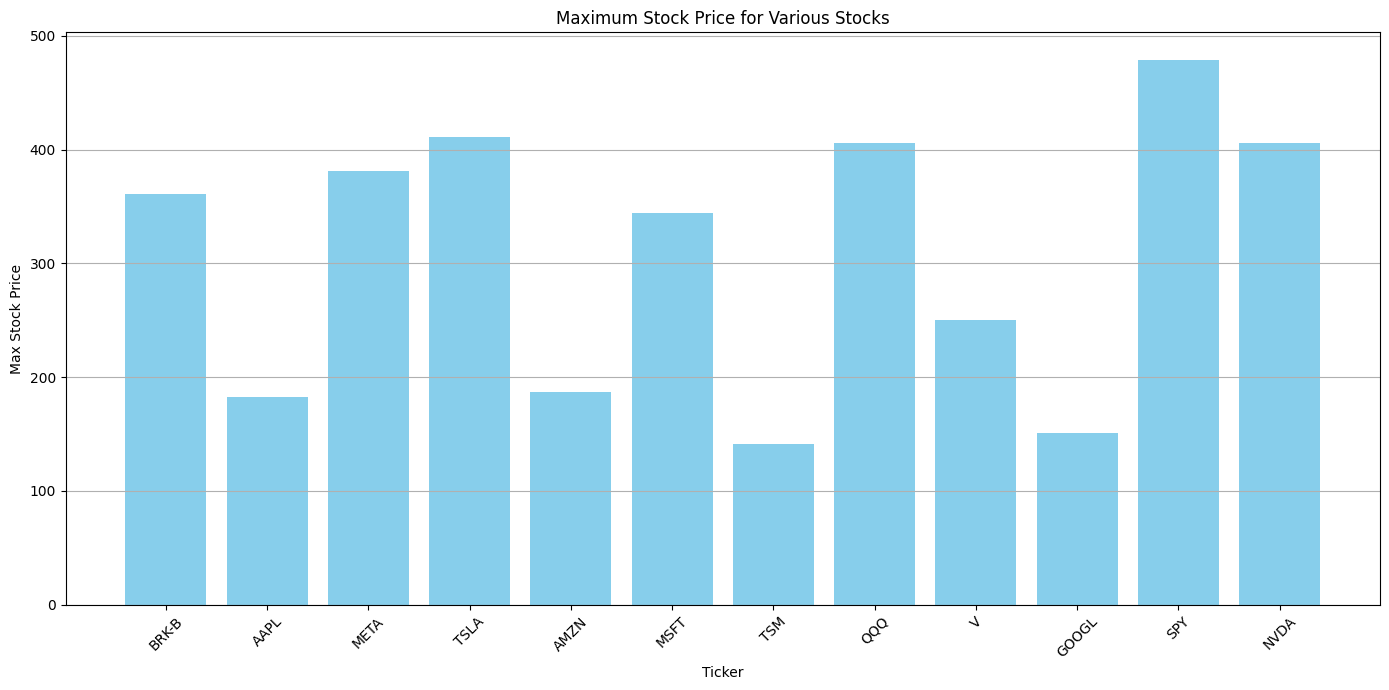

In [40]:
plt.figure(figsize=(14, 7))
plt.bar(aggregated_stocks_pd['Ticker'], aggregated_stocks_pd['MaxStockPrice'], color='skyblue')
plt.title('Maximum Stock Price for Various Stocks')
plt.xlabel('Ticker')
plt.ylabel('Max Stock Price')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

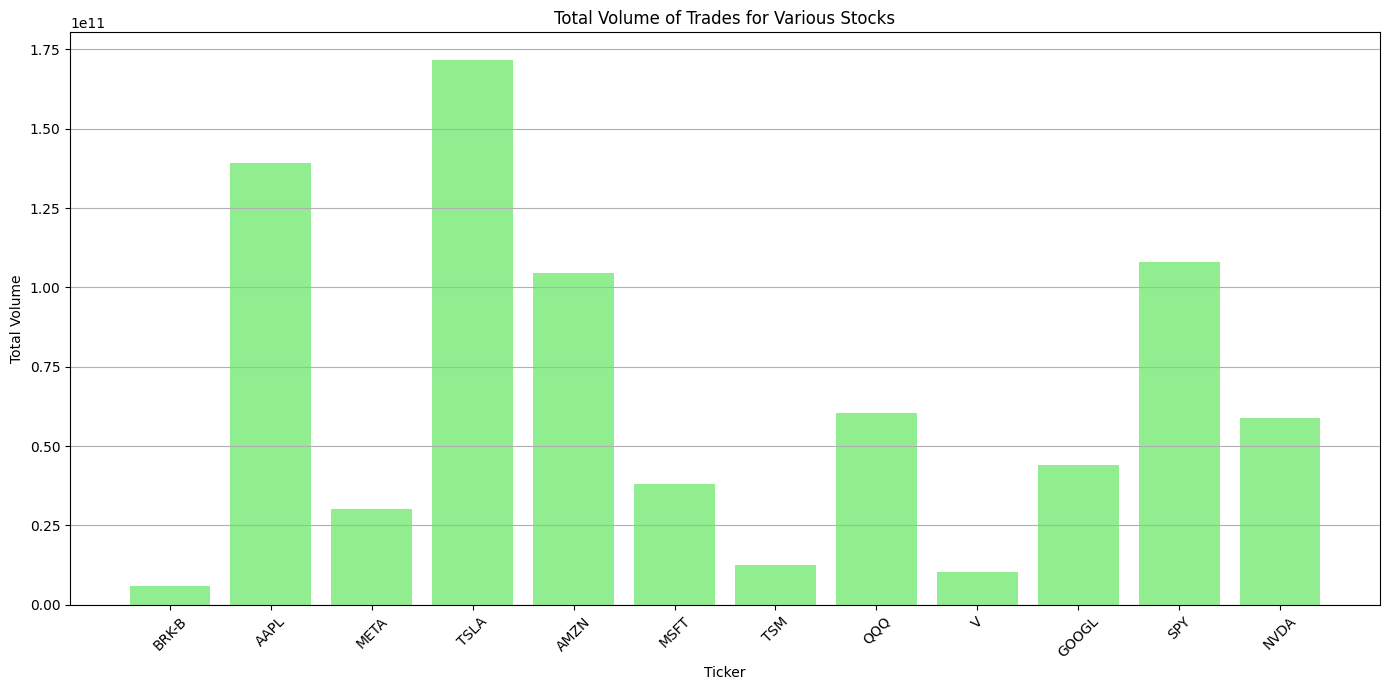

In [41]:
plt.figure(figsize=(14, 7))
plt.bar(aggregated_stocks_pd['Ticker'], aggregated_stocks_pd['TotalVolume'], color='lightgreen')
plt.title('Total Volume of Trades for Various Stocks')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [42]:
## Calculate maximum price of stocks each year => Basic date manipulation operation
cleaned_stocks = (cleaned_stocks.withColumn("Year", func.year(cleaned_stocks.ParsedDate))
                                .withColumn("Month", func.month(cleaned_stocks.ParsedDate))
                                .withColumn("Day", func.dayofmonth(cleaned_stocks.ParsedDate))
                                .withColumn("Week", func.weekofyear(cleaned_stocks.ParsedDate))
                 )

In [43]:
cleaned_stocks.show(10)

+------+----------+-------+------+------+------+------+----+-----+---+----+
|Ticker|ParsedDate| Volume|  Open|   Low|  High| Close|Year|Month|Day|Week|
+------+----------+-------+------+------+------+------+----+-----+---+----+
| BRK-B|2023-05-31|6175417|321.12|319.39|322.41|321.08|2023|    5| 31|  22|
| BRK-B|2023-05-30|3232461|321.86| 319.0|322.47|322.19|2023|    5| 30|  22|
| BRK-B|2023-05-26|3229873|320.44|319.67|322.63| 320.6|2023|    5| 26|  21|
| BRK-B|2023-05-25|4251935|320.56|317.71|320.56|319.02|2023|    5| 25|  21|
| BRK-B|2023-05-24|3075393|322.71|319.56| 323.0| 320.2|2023|    5| 24|  21|
| BRK-B|2023-05-23|4031342|328.19|322.97|329.27|323.11|2023|    5| 23|  21|
| BRK-B|2023-05-22|2763422|330.75|328.35|331.49|329.13|2023|    5| 22|  21|
| BRK-B|2023-05-19|4323538| 331.0|329.12|333.94|330.39|2023|    5| 19|  20|
| BRK-B|2023-05-18|2808329|326.87|325.85|329.98|329.76|2023|    5| 18|  20|
| BRK-B|2023-05-17|3047626|325.02|324.82|328.26|327.39|2023|    5| 17|  20|
+------+----

In [44]:
yearly = cleaned_stocks.groupBy(['Ticker', 'Year']).agg(func.max("Open").alias("YearlHigh"), func.min("Open").alias("YearlyLow"))

In [45]:
yearly.show()

+------+----+---------+---------+
|Ticker|Year|YearlHigh|YearlyLow|
+------+----+---------+---------+
|  META|2020|   300.16|   139.75|
| BRK-B|2023|    331.0|   294.68|
|  MSFT|2019|   159.45|    99.55|
|  MSFT|2021|   344.62|   212.17|
| BRK-B|2018|    224.0|   185.43|
|  META|2021|   381.68|    247.9|
|  TSLA|2019|     29.0|    12.07|
|  META|2018|   215.72|    123.1|
|  AAPL|2020|   138.05|    57.02|
|  MSFT|2020|   229.27|   137.01|
|  TSLA|2021|   411.47|   184.18|
| BRK-B|2021|   300.88|   228.21|
|  TSLA|2018|     25.0|    17.02|
|  MSFT|2018|   115.42|    95.14|
|  AMZN|2020|   177.35|    82.08|
|  META|2022|   339.95|    90.08|
|  AAPL|2022|   182.63|   127.99|
|  META|2019|   208.67|   128.99|
|  TSLA|2020|   233.33|    24.98|
|  AMZN|2022|   170.44|     82.8|
+------+----+---------+---------+
only showing top 20 rows



In [46]:
## Calculate average stock price for stock each month
monthly = cleaned_stocks.groupBy(['Ticker', 'Year', 'Month']).agg(func.max("Open").alias("MonthHigh"), func.min("Open").alias("MonthLow"))
weekly = cleaned_stocks.groupBy(['Ticker', 'Year', 'Week']).agg(func.max("Open").alias("WeekHigh"), func.min("Open").alias("WeekLow"))

In [47]:
monthly.show()

+------+----+-----+---------+--------+
|Ticker|Year|Month|MonthHigh|MonthLow|
+------+----+-----+---------+--------+
| BRK-B|2022|   10|   297.98|  260.58|
|  META|2020|    6|   241.28|  209.75|
| BRK-B|2018|    9|   222.13|  209.21|
|  MSFT|2022|    6|    275.2|  243.86|
|  MSFT|2021|    2|   245.03|  230.01|
|  MSFT|2020|    1|   174.05|  157.08|
| BRK-B|2021|   10|   290.85|  273.02|
| BRK-B|2020|   10|   216.74|  200.03|
|  TSLA|2023|    4|   199.91|  152.64|
|  TSLA|2019|    4|    19.22|   15.72|
|  AMZN|2018|    5|    81.15|   81.15|
|  MSFT|2019|    6|   137.45|  121.28|
|  META|2023|    4|   239.89|  208.84|
|  AMZN|2020|    2|   108.65|   90.73|
|  MSFT|2022|   10|   247.93|  219.85|
|  AMZN|2022|    3|   170.38|  136.68|
|  TSLA|2020|   10|   151.48|  135.63|
| BRK-B|2019|    9|   212.24|  201.19|
|  TSLA|2021|   12|    386.9|  303.57|
| BRK-B|2021|    6|   292.91|   275.0|
+------+----+-----+---------+--------+
only showing top 20 rows



In [48]:
weekly.show()

+------+----+----+--------+-------+
|Ticker|Year|Week|WeekHigh|WeekLow|
+------+----+----+--------+-------+
| BRK-B|2022|  14|   352.0| 341.17|
| BRK-B|2022|  10|  326.59| 322.49|
| BRK-B|2021|  14|  264.22| 260.02|
|  META|2022|  43|  131.68|  97.98|
|  META|2020|   6|  212.51| 203.44|
|  TSLA|2022|  20|  255.72| 235.67|
|  TSLA|2020|  19|   52.92|  46.73|
|  TSLA|2020|  16|   51.49|  39.34|
|  TSLA|2018|  39|   20.86|  18.02|
| BRK-B|2018|  48|  217.23|  209.3|
|  MSFT|2022|   6|  309.87| 301.25|
|  MSFT|2021|   2|  218.47| 213.52|
|  META|2022|  40|  140.49| 136.76|
|  AAPL|2020|  27|   91.96|  88.31|
| BRK-B|2020|  19|  180.05|  173.4|
|  MSFT|2020|   1|  158.78| 158.32|
|  META|2020|  36|  298.88| 287.25|
|  AAPL|2021|  25|  134.45|  130.3|
|  AAPL|2020|  46|   120.5| 115.55|
| BRK-B|2021|  32|  291.81| 287.01|
+------+----+----+--------+-------+
only showing top 20 rows



In [49]:
weekly.withColumn("Spread", weekly['WeekHigh'] - weekly['WeekLow']).show()

+------+----+----+--------+-------+----------+
|Ticker|Year|Week|WeekHigh|WeekLow|    Spread|
+------+----+----+--------+-------+----------+
| BRK-B|2022|  14|   352.0| 341.17| 10.829987|
| BRK-B|2022|  10|  326.59| 322.49|  4.100006|
| BRK-B|2021|  14|  264.22| 260.02|  4.200012|
|  META|2022|  43|  131.68|  97.98|  33.69999|
|  META|2020|   6|  212.51| 203.44|  9.069992|
|  TSLA|2022|  20|  255.72| 235.67| 20.050003|
|  TSLA|2020|  19|   52.92|  46.73| 6.1899986|
|  TSLA|2020|  16|   51.49|  39.34| 12.150002|
|  TSLA|2018|  39|   20.86|  18.02| 2.8400002|
| BRK-B|2018|  48|  217.23|  209.3| 7.9299927|
|  MSFT|2022|   6|  309.87| 301.25|  8.619995|
|  MSFT|2021|   2|  218.47| 213.52|  4.949997|
|  META|2022|  40|  140.49| 136.76|  3.730011|
|  AAPL|2020|  27|   91.96|  88.31| 3.6500015|
| BRK-B|2020|  19|  180.05|  173.4|  6.650009|
|  MSFT|2020|   1|  158.78| 158.32|0.45999146|
|  META|2020|  36|  298.88| 287.25| 11.630005|
|  AAPL|2021|  25|  134.45|  130.3|  4.149994|
|  AAPL|2020|

## 3. Joins

In [50]:
# Joins
cleaned_stocks.join(yearly,
                                      (cleaned_stocks.Ticker==yearly.Ticker) & (cleaned_stocks.Year == yearly.Year),
                                      'inner'
                                     ).show()

+------+----------+-------+------+------+------+------+----+-----+---+----+------+----+---------+---------+
|Ticker|ParsedDate| Volume|  Open|   Low|  High| Close|Year|Month|Day|Week|Ticker|Year|YearlHigh|YearlyLow|
+------+----------+-------+------+------+------+------+----+-----+---+----+------+----+---------+---------+
| BRK-B|2023-05-31|6175417|321.12|319.39|322.41|321.08|2023|    5| 31|  22| BRK-B|2023|    331.0|   294.68|
| BRK-B|2023-05-30|3232461|321.86| 319.0|322.47|322.19|2023|    5| 30|  22| BRK-B|2023|    331.0|   294.68|
| BRK-B|2023-05-26|3229873|320.44|319.67|322.63| 320.6|2023|    5| 26|  21| BRK-B|2023|    331.0|   294.68|
| BRK-B|2023-05-25|4251935|320.56|317.71|320.56|319.02|2023|    5| 25|  21| BRK-B|2023|    331.0|   294.68|
| BRK-B|2023-05-24|3075393|322.71|319.56| 323.0| 320.2|2023|    5| 24|  21| BRK-B|2023|    331.0|   294.68|
| BRK-B|2023-05-23|4031342|328.19|322.97|329.27|323.11|2023|    5| 23|  21| BRK-B|2023|    331.0|   294.68|
| BRK-B|2023-05-22|2763422|3

In [51]:
cleaned_stocks.join(yearly,
                    (cleaned_stocks.Ticker==yearly.Ticker) & (cleaned_stocks.Year == yearly.Year),
                    'inner'
                   ).drop(yearly.Year, yearly.Ticker).show()

+----------+-------+------+------+------+------+-----+---+----+------+----+---------+---------+
|ParsedDate| Volume|  Open|   Low|  High| Close|Month|Day|Week|Ticker|Year|YearlHigh|YearlyLow|
+----------+-------+------+------+------+------+-----+---+----+------+----+---------+---------+
|2023-05-31|6175417|321.12|319.39|322.41|321.08|    5| 31|  22| BRK-B|2023|    331.0|   294.68|
|2023-05-30|3232461|321.86| 319.0|322.47|322.19|    5| 30|  22| BRK-B|2023|    331.0|   294.68|
|2023-05-26|3229873|320.44|319.67|322.63| 320.6|    5| 26|  21| BRK-B|2023|    331.0|   294.68|
|2023-05-25|4251935|320.56|317.71|320.56|319.02|    5| 25|  21| BRK-B|2023|    331.0|   294.68|
|2023-05-24|3075393|322.71|319.56| 323.0| 320.2|    5| 24|  21| BRK-B|2023|    331.0|   294.68|
|2023-05-23|4031342|328.19|322.97|329.27|323.11|    5| 23|  21| BRK-B|2023|    331.0|   294.68|
|2023-05-22|2763422|330.75|328.35|331.49|329.13|    5| 22|  21| BRK-B|2023|    331.0|   294.68|
|2023-05-19|4323538| 331.0|329.12|333.94

In [52]:
historic_stocks = cleaned_stocks.join(yearly,
                    (cleaned_stocks.Ticker==yearly.Ticker) & (cleaned_stocks.Year == yearly.Year),
                    'inner'
                   ).drop(yearly.Year, yearly.Ticker)

In [53]:
historic_stocks.show(5)

+----------+-------+------+------+------+------+-----+---+----+------+----+---------+---------+
|ParsedDate| Volume|  Open|   Low|  High| Close|Month|Day|Week|Ticker|Year|YearlHigh|YearlyLow|
+----------+-------+------+------+------+------+-----+---+----+------+----+---------+---------+
|2023-05-31|6175417|321.12|319.39|322.41|321.08|    5| 31|  22| BRK-B|2023|    331.0|   294.68|
|2023-05-30|3232461|321.86| 319.0|322.47|322.19|    5| 30|  22| BRK-B|2023|    331.0|   294.68|
|2023-05-26|3229873|320.44|319.67|322.63| 320.6|    5| 26|  21| BRK-B|2023|    331.0|   294.68|
|2023-05-25|4251935|320.56|317.71|320.56|319.02|    5| 25|  21| BRK-B|2023|    331.0|   294.68|
|2023-05-24|3075393|322.71|319.56| 323.0| 320.2|    5| 24|  21| BRK-B|2023|    331.0|   294.68|
+----------+-------+------+------+------+------+-----+---+----+------+----+---------+---------+
only showing top 5 rows



In [54]:
cond = [(historic_stocks.Ticker==weekly.Ticker) & (historic_stocks.Year == weekly.Year) & (historic_stocks.Week == weekly.Week)]
historic_stocks = historic_stocks.join(weekly, cond, 'inner').drop(weekly.Year, historic_stocks.Ticker, weekly.Week)

In [55]:
historic_stocks.show(5)

+----------+-------+------+------+------+------+-----+---+----+---------+---------+------+----+--------+-------+
|ParsedDate| Volume|  Open|   Low|  High| Close|Month|Day|Year|YearlHigh|YearlyLow|Ticker|Week|WeekHigh|WeekLow|
+----------+-------+------+------+------+------+-----+---+----+---------+---------+------+----+--------+-------+
|2023-05-31|6175417|321.12|319.39|322.41|321.08|    5| 31|2023|    331.0|   294.68| BRK-B|  22|  321.86| 321.12|
|2023-05-30|3232461|321.86| 319.0|322.47|322.19|    5| 30|2023|    331.0|   294.68| BRK-B|  22|  321.86| 321.12|
|2023-05-26|3229873|320.44|319.67|322.63| 320.6|    5| 26|2023|    331.0|   294.68| BRK-B|  21|  330.75| 320.44|
|2023-05-25|4251935|320.56|317.71|320.56|319.02|    5| 25|2023|    331.0|   294.68| BRK-B|  21|  330.75| 320.44|
|2023-05-24|3075393|322.71|319.56| 323.0| 320.2|    5| 24|2023|    331.0|   294.68| BRK-B|  21|  330.75| 320.44|
+----------+-------+------+------+------+------+-----+---+----+---------+---------+------+----+-

In [56]:
historic_stocks = historic_stocks.join(monthly, ['Ticker', 'Year', 'Month'])

In [57]:
historic_stocks.columns

['Ticker',
 'Year',
 'Month',
 'ParsedDate',
 'Volume',
 'Open',
 'Low',
 'High',
 'Close',
 'Day',
 'YearlHigh',
 'YearlyLow',
 'Week',
 'WeekHigh',
 'WeekLow',
 'MonthHigh',
 'MonthLow']

In [58]:
final_stocks = historic_stocks.select(['Ticker', 'Year',
 'Month', 'Day', 'Week', 'Volume','Open','Low','High','Close', 'YearlHigh','YearlyLow','WeekHigh','WeekLow',
 'MonthHigh','MonthLow'])

In [59]:
final_stocks.show(5)

+------+----+-----+---+----+-------+------+------+------+------+---------+---------+--------+-------+---------+--------+
|Ticker|Year|Month|Day|Week| Volume|  Open|   Low|  High| Close|YearlHigh|YearlyLow|WeekHigh|WeekLow|MonthHigh|MonthLow|
+------+----+-----+---+----+-------+------+------+------+------+---------+---------+--------+-------+---------+--------+
| BRK-B|2023|    5| 31|  22|6175417|321.12|319.39|322.41|321.08|    331.0|   294.68|  321.86| 321.12|    331.0|  320.44|
| BRK-B|2023|    5| 30|  22|3232461|321.86| 319.0|322.47|322.19|    331.0|   294.68|  321.86| 321.12|    331.0|  320.44|
| BRK-B|2023|    5| 26|  21|3229873|320.44|319.67|322.63| 320.6|    331.0|   294.68|  330.75| 320.44|    331.0|  320.44|
| BRK-B|2023|    5| 25|  21|4251935|320.56|317.71|320.56|319.02|    331.0|   294.68|  330.75| 320.44|    331.0|  320.44|
| BRK-B|2023|    5| 24|  21|3075393|322.71|319.56| 323.0| 320.2|    331.0|   294.68|  330.75| 320.44|    331.0|  320.44|
+------+----+-----+---+----+----

In [60]:
# SQL Queries using pyspark

In [61]:
final_stocks.createOrReplaceTempView('stockData')

In [62]:
spark.sql("SELECT * FROM stockData where Ticker='MSFT' and Year='2023'").show(5)

+------+----+-----+---+----+--------+------+------+------+------+---------+---------+--------+-------+---------+--------+
|Ticker|Year|Month|Day|Week|  Volume|  Open|   Low|  High| Close|YearlHigh|YearlyLow|WeekHigh|WeekLow|MonthHigh|MonthLow|
+------+----+-----+---+----+--------+------+------+------+------+---------+---------+--------+-------+---------+--------+
|  MSFT|2023|    5| 31|  22|45950550|332.29|327.33|335.94|328.39|   335.23|    223.0|  335.23| 332.29|   335.23|  305.72|
|  MSFT|2023|    5| 30|  22|29503070|335.23|330.52|335.74|331.21|   335.23|    223.0|  335.23| 332.29|   335.23|  305.72|
|  MSFT|2023|    5| 26|  21|36630630|324.02|323.88| 333.4|332.89|   335.23|    223.0|  324.02| 314.73|   335.23|  305.72|
|  MSFT|2023|    5| 25|  21|43301740|323.24| 320.0| 326.9|325.92|   335.23|    223.0|  324.02| 314.73|   335.23|  305.72|
|  MSFT|2023|    5| 24|  21|23384890|314.73|312.61| 316.5|313.85|   335.23|    223.0|  324.02| 314.73|   335.23|  305.72|
+------+----+-----+---+-

## 4. Advanced Analysis

In [63]:
snapshot = cleaned_stocks.select(['Ticker', 'ParsedDate', 'Open'])

In [64]:
snapshot.show()

+------+----------+------+
|Ticker|ParsedDate|  Open|
+------+----------+------+
| BRK-B|2023-05-31|321.12|
| BRK-B|2023-05-30|321.86|
| BRK-B|2023-05-26|320.44|
| BRK-B|2023-05-25|320.56|
| BRK-B|2023-05-24|322.71|
| BRK-B|2023-05-23|328.19|
| BRK-B|2023-05-22|330.75|
| BRK-B|2023-05-19| 331.0|
| BRK-B|2023-05-18|326.87|
| BRK-B|2023-05-17|325.02|
| BRK-B|2023-05-16|322.46|
| BRK-B|2023-05-15|322.89|
| BRK-B|2023-05-12|323.82|
| BRK-B|2023-05-11| 321.0|
| BRK-B|2023-05-10|326.08|
| BRK-B|2023-05-09|324.87|
| BRK-B|2023-05-08|328.26|
| BRK-B|2023-05-05|323.36|
| BRK-B|2023-05-04|323.44|
| BRK-B|2023-05-03|327.13|
+------+----------+------+
only showing top 20 rows



In [65]:
# Convert to Pandas DataFrame
snapshot_pd = snapshot.toPandas()

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
snapshot_pd['ParsedDate'] = pd.to_datetime(snapshot_pd['ParsedDate'])

# Filter data for a specific stock, e.g., 'MSFT'
stock_data = snapshot_pd[snapshot_pd['Ticker'] == 'MSFT']

In [68]:
stock_data = stock_data.sort_values(by='ParsedDate')

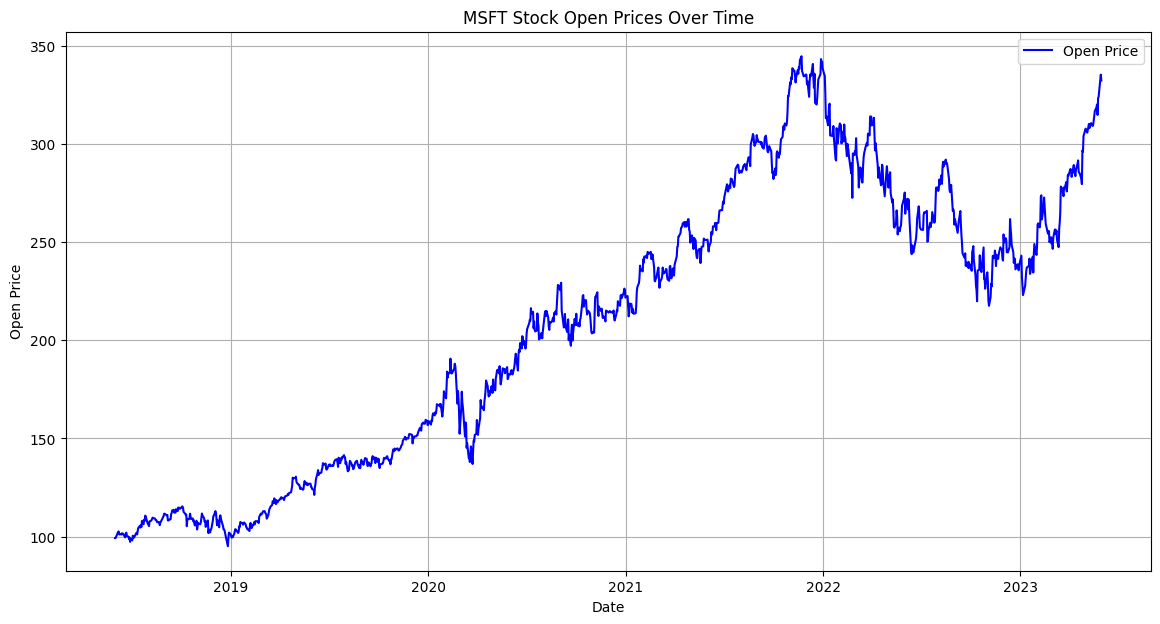

In [69]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['ParsedDate'], stock_data['Open'], label='Open Price', color='blue')
plt.title('MSFT Stock Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
from pyspark.sql.window import Window

In [71]:
lag1Day = Window.partitionBy("Ticker").orderBy("ParsedDate")

In [72]:
snapshot.withColumn("PreviousOpen", func.lag("Open", 1).over(lag1Day)).show()

+------+----------+-----+------------+
|Ticker|ParsedDate| Open|PreviousOpen|
+------+----------+-----+------------+
|  AAPL|2018-05-31|46.81|        NULL|
|  AAPL|2018-06-01| 47.0|       46.81|
|  AAPL|2018-06-04|47.91|        47.0|
|  AAPL|2018-06-05|48.27|       47.91|
|  AAPL|2018-06-06|48.41|       48.27|
|  AAPL|2018-06-07|48.54|       48.41|
|  AAPL|2018-06-08|47.79|       48.54|
|  AAPL|2018-06-11|47.84|       47.79|
|  AAPL|2018-06-12|47.85|       47.84|
|  AAPL|2018-06-13|48.11|       47.85|
|  AAPL|2018-06-14|47.89|       48.11|
|  AAPL|2018-06-15|47.51|       47.89|
|  AAPL|2018-06-18|46.97|       47.51|
|  AAPL|2018-06-19|46.29|       46.97|
|  AAPL|2018-06-20|46.59|       46.29|
|  AAPL|2018-06-21|46.81|       46.59|
|  AAPL|2018-06-22|46.53|       46.81|
|  AAPL|2018-06-25|45.85|       46.53|
|  AAPL|2018-06-26|45.75|       45.85|
|  AAPL|2018-06-27|46.31|       45.75|
+------+----------+-----+------------+
only showing top 20 rows



In [73]:
## Calculate moving average
movingAverage = Window.partitionBy("Ticker").orderBy("ParsedDate").rowsBetween(-50, 0)

In [74]:
(snapshot.withColumn("MA50", func.avg("Open").over(movingAverage))
         .withColumn("MA50", func.round("MA50", 2))).show()

+------+----------+-----+-----+
|Ticker|ParsedDate| Open| MA50|
+------+----------+-----+-----+
|  AAPL|2018-05-31|46.81|46.81|
|  AAPL|2018-06-01| 47.0|46.91|
|  AAPL|2018-06-04|47.91|47.24|
|  AAPL|2018-06-05|48.27| 47.5|
|  AAPL|2018-06-06|48.41|47.68|
|  AAPL|2018-06-07|48.54|47.82|
|  AAPL|2018-06-08|47.79|47.82|
|  AAPL|2018-06-11|47.84|47.82|
|  AAPL|2018-06-12|47.85|47.82|
|  AAPL|2018-06-13|48.11|47.85|
|  AAPL|2018-06-14|47.89|47.86|
|  AAPL|2018-06-15|47.51|47.83|
|  AAPL|2018-06-18|46.97|47.76|
|  AAPL|2018-06-19|46.29|47.66|
|  AAPL|2018-06-20|46.59|47.59|
|  AAPL|2018-06-21|46.81|47.54|
|  AAPL|2018-06-22|46.53|47.48|
|  AAPL|2018-06-25|45.85|47.39|
|  AAPL|2018-06-26|45.75| 47.3|
|  AAPL|2018-06-27|46.31|47.25|
+------+----------+-----+-----+
only showing top 20 rows



In [75]:
maximumStock = Window.partitionBy("Ticker").orderBy(snapshot.Open.desc())

In [76]:
snapshot.withColumn("MaxOpen", func.row_number().over(maximumStock)).show()

+------+----------+------+-------+
|Ticker|ParsedDate|  Open|MaxOpen|
+------+----------+------+-------+
|  AAPL|2022-01-04|182.63|      1|
|  AAPL|2021-12-13|181.12|      2|
|  AAPL|2021-12-28|180.16|      3|
|  AAPL|2022-01-05|179.61|      4|
|  AAPL|2021-12-30|179.47|      5|
|  AAPL|2021-12-29|179.33|      6|
|  AAPL|2021-12-16|179.28|      7|
|  AAPL|2022-03-30|178.55|      8|
|  AAPL|2021-12-31|178.09|      9|
|  AAPL|2022-03-31|177.84|     10|
|  AAPL|2022-01-03|177.83|     11|
|  AAPL|2022-04-05| 177.5|     12|
|  AAPL|2023-05-31|177.33|     13|
|  AAPL|2021-12-27|177.09|     14|
|  AAPL|2023-05-30|176.96|     15|
|  AAPL|2022-03-29|176.69|     16|
|  AAPL|2023-05-19|176.39|     17|
|  AAPL|2022-01-12|176.12|     18|
|  AAPL|2022-02-09|176.05|     19|
|  AAPL|2021-12-23|175.85|     20|
+------+----------+------+-------+
only showing top 20 rows



In [77]:
## Calculate top 5 highest close price for each stock in a year
snapshot.withColumn("MaxOpen", func.row_number().over(maximumStock)).filter("MaxOpen<=5").show()

+------+----------+------+-------+
|Ticker|ParsedDate|  Open|MaxOpen|
+------+----------+------+-------+
|  AAPL|2022-01-04|182.63|      1|
|  AAPL|2021-12-13|181.12|      2|
|  AAPL|2021-12-28|180.16|      3|
|  AAPL|2022-01-05|179.61|      4|
|  AAPL|2021-12-30|179.47|      5|
|  AMZN|2021-07-12| 187.2|      1|
|  AMZN|2021-07-09|186.13|      2|
|  AMZN|2021-07-07|185.87|      3|
|  AMZN|2021-11-19|185.63|      4|
|  AMZN|2021-07-14|185.44|      5|
| BRK-B|2022-03-29|361.39|      1|
| BRK-B|2022-03-28|360.59|      2|
| BRK-B|2022-03-31| 359.0|      3|
| BRK-B|2022-03-30|354.66|      4|
| BRK-B|2022-03-25| 353.9|      5|
| GOOGL|2022-02-02|151.25|      1|
| GOOGL|2021-11-19|149.98|      2|
| GOOGL|2021-11-08|149.83|      3|
| GOOGL|2021-11-22|149.33|      4|
| GOOGL|2021-11-09|149.23|      5|
+------+----------+------+-------+
only showing top 20 rows



In [78]:
result = snapshot.withColumn("MaxOpen", func.row_number().over(maximumStock)).filter("MaxOpen<=5")

In [79]:
moving_avg = (snapshot.withColumn("MA50", func.avg("Open").over(movingAverage))
         .withColumn("MA50", func.round("MA50", 2)))